<a href="https://colab.research.google.com/github/mariron42/FisicaComputacional-1/blob/main/Actividad%2010/%20Actividad_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Marcel Herrera Rendón

In [ ]:
#Importar liberías 
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

**Actividad 10**


---



**Ejercicio 1:**
Resuelva la Ecuación del calor, usando el método anterior para el siguiente caso:




**Caso a)**

Una barra metálica de longitud $L=10$, y coeficiente de difusión $\kappa=100$. Condición inicial (Temperatura dentro de la barra): u(x,0) = 0.

Condiciones a la frontera: u(0,t)=10, u(L,t)=0.

Realice los cálculos hasta alcanzar el equilibrio térmico.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: The following kwargs were not used by contour: 'lw'


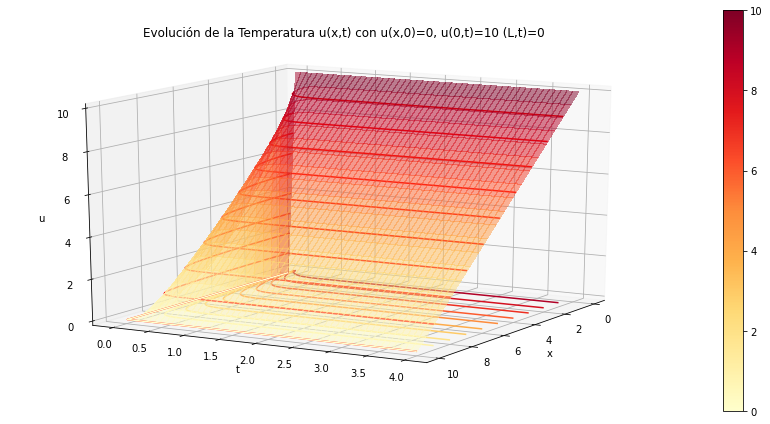

In [ ]:
#Condciones 

#Numero de pasos 
#Espacio 
M = 20 
#Tiempo 
N = 5000 


#Definir el intervalo 
#en x
a = 0
b = 10 

#en Tiempo 
t0 = 0
tf = 4.0

deltax = (b-a)/(M-1)
deltat = (tf-t0)/(N-1)

x = np.linspace(a,b,M)
t = np.linspace(t0,tf,N)


#Constante de difusión del calor 
kappa = 100
alpha = kappa*deltat/deltax**2


#Matriz de la sol 

u = np.zeros((M,N))#llenar de ceros

# Condiciones
u[:,0] = np.zeros(x.shape)
u[0,:] = 10
u[-1,:] = 0

# Método diferencias finitas 
# En el tiempo
for i in range (0,N-1):
  # En el espacio
  for j in range (1,M-1):
    u[j,i+1] = alpha*u[j-1,i] + (1-2*alpha)*u[j,i] + alpha*u[j+1,i]

T,X = np.meshgrid(t,x)

#Mapa de color 
mapac="YlOrRd"
fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,T,u,cmap=mapac,linewidth=0.01,antialiased=False,alpha=0.5)

ax.contour(X,T,u,10,lw=1,colors='Red',linestyles='solid')
ax.contour(X,T,u,10,lw=1,cmap=mapac,linestyles='solid',offset=0)

# Para escala de temperaturas
m = cm.ScalarMappable(cmap=mapac)
m.set_array(u)
plt.colorbar(m)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=15,azim=30)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=0, u(0,t)=10 (L,t)=0')

plt.tight_layout()
plt.show()

**Caso b)**

Un material de longitud $L=10$ con coeficiente de difusión térmica $\kappa=0.25$

Condición inicial u(x,0)=20.

Condiciones a la frontera: u(0,t)=(20 + 10 sin(pi*t/12), u(L,t)=20.

Realice los cálculos para t=(0,48)

Pueden ajustar los parámetros para ver cómo cambia la temperatura dentro del cuerpo.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: The following kwargs were not used by contour: 'lw'


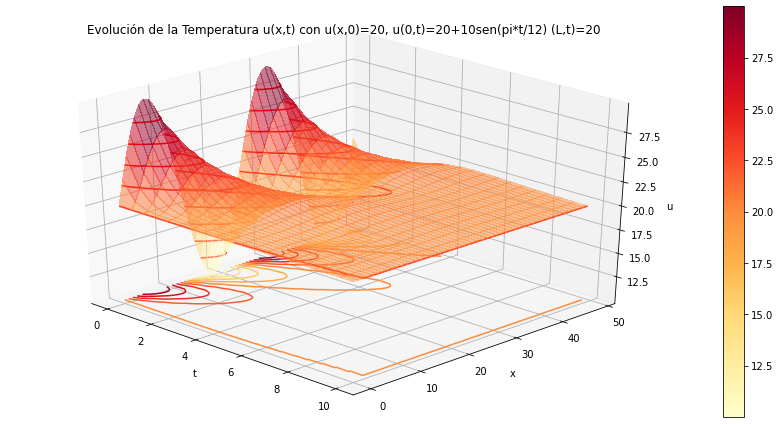

In [ ]:
# Intervalos 
# En x
a = 0
b = 10

# En Tiempo
t0 = 0
tf = 48.0


# Pasos
M = 20 # En el espacio
N = 5000 # En el tiempo


deltax = (b-a)/(M-1)
deltat = (tf-t0)/(N-1)

x = np.linspace(a,b,M)
t = np.linspace(t0,tf,N)

k = 0.25 # Constante difusión del calor
alpha = k*deltat/deltax**2

# Para matriz de la sol
# LLenamos de ceros inicialmente
u = np.zeros((M,N))

# Condiciones
u[:,0] = 20.0*np.ones(x.shape)
u[0,:] = 20 + 10*np.sin(np.pi*t/12)
u[-1,:] = 20

# Método diferencias finitas 
# En el tiempo
for i in range (0,N-1):
  # En el espacio
  for j in range (1,M-1):
    u[j,i+1] = alpha*u[j-1,i] + (1-2*alpha)*u[j,i] + alpha*u[j+1,i]

T,X = np.meshgrid(t,x)

#Mapa de color 
mapac="YlOrRd"
fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,T,u,cmap=mapac,linewidth=0.01,antialiased=False,alpha=0.5)

ax.contour(X,T,u,10,lw=1,colors='Red',linestyles='solid')
ax.contour(X,T,u,10,lw=1,cmap=mapac,linestyles='solid',offset=10)

# Para escala de temperaturas
m = cm.ScalarMappable(cmap=mapac)
m.set_array(u)
plt.colorbar(m)


#Parametros de la grafica 
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')
ax.view_init(elev=30,azim=-45)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=20, u(0,t)=20+10sen(pi*t/12) (L,t)=20')

plt.tight_layout()
plt.show()

**Problema 2:**

Variaciones de la Temperatura en el Suelo

La superficie de la Tierra recibe radiación solar durante el día. Esta Energía la transforma en calor, y cambia la temperatura dentro del suelo. Por la noche al no recibir radiación solar la emite a la atmósfera.

Si suponemos que la temperatura del suelo varía con la profundidad, podemos suponer que tenemos un problema unidimensional, siendo el eje x la dirección hacia dentro del suelo.

A cierta profundidad x=L, suponemos que la temperatura ya no cambia, es decir ∂u/∂x=0 (Condición de Neumann).

Supondremos que la variación de la temperatura en la superficie terrestre varía como

u(0,t)=u0+uasin(2πtP)

donde u0 es la inical temperatura promedio del suelo y ua es la temperatura del aire. La constante P es el periodo de variación diaria de temperatura P=24h=86,400s.

En este caso la constante de difusión de calor es κ=1.0×10−6. El tiempo será medido en segundos.

Usando la Ecuación de Calor, determina numéricamente la variación del perfil de temperatura dentro del suelo, por ejemplo para Hermosillo en estos días supongamos que u0=15ºC, ua=20ºC.

Realiza una simulación de al menos 48 horas.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: UserWarning: The following kwargs were not used by contour: 'lw'


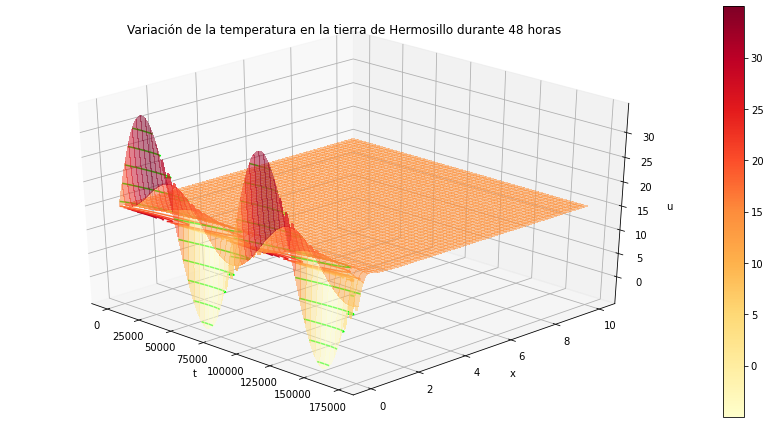

In [ ]:
#Proble del calor y la tierra 

#Intervalos 
#En x
a = 0
b = 10

#En tiempo 
t0 = 0
tf = 172800

# Pasos
M = 200 # En el espacio
N = 4000 # En el tiempo

#Periodo de variación diaria de temperatura (24h en segundos)
P = 86400 
deltax = (b-a)/(M-1)
deltat = (tf-t0)/(N-1)

x = np.linspace(a,b,M)
t = np.linspace(t0,tf,N)

# Constante difusión del calor
k = 1e-6 
alpha = k*deltat/deltax**2

# Para matriz de la sol
# LLenamos de ceros inicialmente
u = np.zeros((M,N))


# Condiciones
u[:,0] = 15*np.ones(x.shape)
u[0,:] = 15 + 20*np.sin(2*np.pi*t/P)
u[-1,:] = 15

# Método diferencias finitas 
# En el tiempo
for i in range (0,N-1):
  # En el espacio
  for j in range (1,M-1):
    u[j,i+1] = alpha*u[j-1,i] + (1-2*alpha)*u[j,i] + alpha*u[j+1,i]

T,X = np.meshgrid(t,x)

#Mapa de color 
mapac="YlOrRd"
fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T,X,u,cmap=mapac,linewidth=0.01,antialiased=False,alpha=0.5)

ax.contour(T,X,u,10,lw=1,colors='lime',linestyles='solid')
ax.contour(T,X,u,10,lw=1,cmap=mapac,linestyles='solid',offset=15)

# Escala de temperaturas
m = cm.ScalarMappable(cmap=mapac)
m.set_array(u)
plt.colorbar(m)

#Graficar 
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')
ax.view_init(elev=30,azim=-45)
ax.set_title('Variación de la temperatura en la tierra de Hermosillo durante 48 horas')

plt.tight_layout()
plt.show()